# **Quiz 2**
Valeria Ferreira Nocua
Septiembre 20, 2023

Consider the simple polygon given by the sequence of points $P$.


Let $P = ((8,6), (11,15), (13,13), (12,1), (9,0.5))$

We already have an algorithm that generates the doucly-connected edge list of a simple polygon. Develop an algorithm that adds a diagonal linking two vertex and updates the doubly connected edge list. **The output must be the updated list of half-edges**

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [184]:
#clase punto que es para un vértice, tiene x, y, y su nombre
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [185]:
class Edge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp

  def __repr__(self):
    return(f"(inicio: {self.startp}, final: {self.endp})")

In [186]:
#graficar ploigonooos
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'darkviolet')
    xcoor.append(i.x)
    ycoor.append(i.y)
    plt.annotate(i.name, xy=[i.x, i.y])
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'hotpink')
  
  
  plt.show()

In [187]:
def toPoint(P):
  #pasa una lista de puntos a una lista de elementos de la clase puntos
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i+1)))
  
  return points

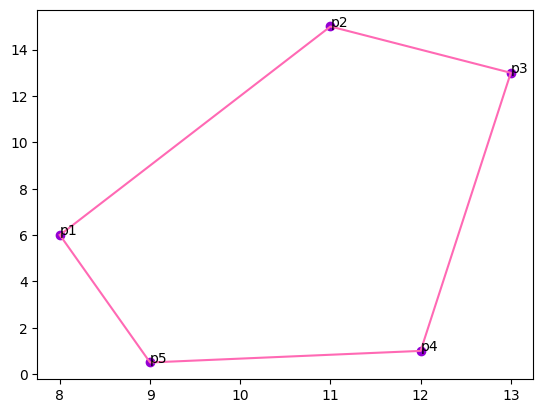

In [188]:
P = [(8,6), (11,15), (13,13), (12,1), (9,0.5)]
vertex = toPoint(P)
polygon(vertex)

In [189]:
#semi arista
class HalfEdge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = None
    self.next = None
    self.prev = None
    self.face = None
    self.name = f'e{startp.name[1]}1'

  def __repr__(self):
    #return(f"(inicio: {self.startp}, final: {self.endp})")
    return (f'{self.name}')

In [190]:
#Saca las aristas del polígono
def EdgesList(points):

  edges = []
  for i in range(len(points)-1):
    e = HalfEdge(points[i], points[i+1])
    edges.append(e)

  edges.append(HalfEdge(points[-1], points[0]))
  return edges

#Twin de la semi arista
def twin(x):
  if x.name[2] == "1":
    return str(x.name[0]+x.name[1]+"2")
  else:
    return str(x.name[0] + x.name[1] + "1")
  
#Asigna prev, next y twin a la semi arista
def AssignValues (edges):


  for i in range(len(edges)-1):
    e = edges[i]
    e.next = edges[i+1]
    e.prev = edges[i-1]
    e.twin = twin(e)
  
  e = edges[-1]
  e.next = edges[0]
  e.prev = edges[-2]
  e.twin = twin(e)

  return edges

#Saca la lista de aristas en un dataframe
def ListOfedges(edges):
    names, origin, twins, next, prev, face = [],[],[],[],[],[]
    for e in edges:
      names.append(e)
      origin.append(e.startp)
      twins.append(e.twin)
      next.append(e.next)
      prev.append(e.prev)
      face.append(e.face)

    df = {'Arista': names, 'Origen': origin, 'Twin': twins, 'Next': next, 
          'Previous': prev, 'CaraIn': face}
    dcel = pd.DataFrame(df)

    return dcel

In [191]:
edges = EdgesList(vertex)
edges = AssignValues(edges)

doublyConnected = ListOfedges(edges)
doublyConnected

,Arista,Origen,Twin,Next,Previous,CaraIn
0,e11,"(8, 6)",e12,e21,e51,None
1,e21,"(11, 15)",e22,e31,e11,None
2,e31,"(13, 13)",e32,e41,e21,None
3,e41,"(12, 1)",e42,e51,e31,None
4,e51,"(9, 0.5)",e52,e11,e41,None


> Vamos a hacer un cógigo que agregue una nueva diagonal y actualice la lista de aristas
>
>La función *newEdge* recibe como parámetros los puntos de inicio y fin de la nueva diagonal, y la lista de semiaristas que se creó anteriormente

In [192]:
def newEdge(startp, endp, df, edges):
    #creamos una nueva semiarista que será la diagonal con los puntos dados
    new = HalfEdge(startp, endp)
    #Asignamos el nombre
    new.name = f'e{startp.name[1]}3' #El nombre de las diagonales será e + numero del vertice + 3
    #Creamos los nuevos datos
    newData = {'Arista': [new.name], 'Origen': [new.startp], 'Twin': [new.twin], 'Next': [new.next], 
          'Previous': [new.prev], 'CaraIn': [new.face]}
    #Los ponemos en un dataframe y creamos un dataframe nuevo con los datos actualizados
    df2 = pd.DataFrame(newData)
    newDf = pd.concat([df, df2], ignore_index = True)
    newDf.reset_index()

    edges.append(new)
    
    return newDf

    

In [193]:
newEdge(vertex[0], vertex[2], doublyConnected, edges)


,Arista,Origen,Twin,Next,Previous,CaraIn
0,e11,"(8, 6)",e12,e21,e51,None
1,e21,"(11, 15)",e22,e31,e11,None
2,e31,"(13, 13)",e32,e41,e21,None
3,e41,"(12, 1)",e42,e51,e31,None
4,e51,"(9, 0.5)",e52,e11,e41,None
5,e13,"(8, 6)",None,None,None,None


In [194]:
def polygonByEdges(edges):
  xcoor = []
  ycoor = []
  xdiag = []
  ydiag = []
  for i in edges:
    plt.scatter(i.startp.x, i.startp.y, marker = 'o', color = 'darkviolet')
    plt.scatter(i.endp.x, i.endp.y, marker = 'o', color = 'darkviolet')
    if i.name[2] == '3':
      xdiag.append(i.startp.x)
      xdiag.append(i.endp.x)
      ydiag.append(i.startp.y)
      ydiag.append(i.endp.y)
    else:
      xcoor.append(i.startp.x)
      ycoor.append(i.startp.y)
      xcoor.append(i.endp.x)
      ycoor.append(i.endp.y)
    plt.annotate(i.startp.name, xy=[i.startp.x, i.startp.y])
  
  
  plt.plot(xcoor, ycoor,color = 'hotpink')
  plt.plot(xdiag, ydiag, color = 'red')
  
  
  plt.show()  

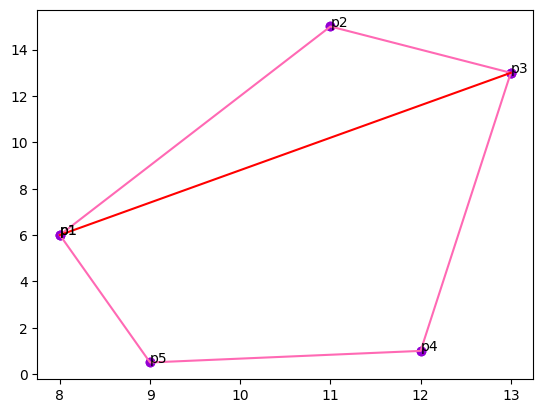

In [195]:
#graficar las nuevas diagonales de diferente color 
polygonByEdges(edges)